##**Description**
###**Objective**

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

#####**Expected to do the following :**

- Explore the dataset and extract actionable insights that will enable growth in the market.
- Come up with a customer profile (characteristics of a customer) of the different products
- Perform univariate and multivariate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers.


###**Data Dictionary**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

- Product - The model no. of the treadmill
- Age -  Age of the customer in no of years
- Gender - Gender of the customer
- Education - Education of the customer in no. of years
- Marital Status - Marital status of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - Income of the customer
- Miles- Miles that a customer expects to run


##**Importing the libraries**

In [1]:
#importing all the python libraries necessary for data manipulations/calculations
import numpy as np
import pandas as pd
#importing libraries necessary for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#importing libraries necessary to clean the datetime columns(if any)
import datetime as dt

#to display values upto 4 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' %x)

#
import warnings
warnings.filterwarnings("ignore")

**Mounting the google drive to colab notebook**

In [2]:
#mounting google drive to the colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Reading the dataset.**
**Let us read the dataset into the a dataframe varibale 'data' and make a copy to another varible 'cardio' to retain the original dataset.**

In [3]:
#reading the dataset from the csv file
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CardioGoodFitness.csv')
# copying data to another varaible to avoid any changes to original data
cardio = data.copy()

**Printing the first 10 records of the dataset**

In [4]:
#accessing the first 10 rows of the dataset
cardio.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


- The first 10 rows/records of the dataset have records of the Product **TM195** with age between 18 and 21 of these, most of them have 13 to 15 years of Education(Undergrads).
- Most of the Self rated fitness score is 3.
- **And these insights are just from the first 10 records. Let us deep dive to get more strong insights.**

**Printing the last 10 records of the dataset**

In [5]:
#accessing the last 5 records using tail() function
cardio.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200
172,TM798,34,Male,16,Single,5,5,92131,150
173,TM798,35,Male,16,Partnered,4,5,92131,360
174,TM798,38,Male,18,Partnered,5,5,104581,150
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


- All the last 10 records are regarding the model **TM798**
- Age is mostly around 40s most of them are Men.
- Self rated fitness score is high(5).
- Salaries from range 83k to 104k.
- Miles that a customer expects to run is from 120 to 200 and Usage is 4 to 5 days in a week..
- From this we can say that the customers who are fitness conscious prefer this model**TM798** and we can  further analyze to prove this statement.

**Finding the shape(number of rows and number of columns) of the dataset**

In [6]:
print(f"There are {cardio.shape[0]} rows and {cardio.shape[1]} columns in the dataset ")

There are 180 rows and 9 columns in the dataset 


**Finding the datatypes of all the columns of the dataset**

In [7]:
#finding the datatypes of the columns
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


From the above information, we got to know the following:

* There are 180 entries with index 0 to 179 and 9 columns(from 0 to 8).
* There are 6 columns of integer datatype(Age, Education, Usage, Fitness, Income, Miles) and 3 columns of object(string) datatype: Product, Gender, Marital Status.
* The Fitness column should be category type instead of integer as it is the rating of the customers for self-fitness on scale of 5. So let us change it into category.
* Similarly let us change the Product, Gender, MaritalStatus to category too.
* **Converting the datatypes from "object" to "category" reduces the memory usage of the dataset.**
* From the Non-null count, we can see that there are no null values in any of the columns. As all the columns have 180 non-null values which is equal to the number of rows in a column.

**Converting the object datatypes to category and Fitness column to category datatype**

In [8]:
cardio['Fitness'] = cardio['Fitness'].astype('category')
cardio['Gender'] = cardio['Gender'].astype('category')
cardio['MaritalStatus'] = cardio['MaritalStatus'].astype('category')
cardio['Product'] = cardio['Product'].astype('category')

In [9]:
#Let us check the info() of the dataset again
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


- There are now 4 category and 5 integer columns.
- The memory usage also reduced from 12.8+KB to 8.4KB.

**Let us confirm on the null values**

In [10]:
#Calculating the number of null values in all the columns which proves us presence of null values
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- There are no null values in the dataset.

**Let us find for any duplicate values**

In [11]:
cardio.duplicated().sum()

0

- There are no duplicates in the dataset.

**Getting the statistical summary of all the numerical values**

In [12]:
#finding the statistical summary of the numerical columns
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0000,28.7889,6.9435,18.0000,24.0000,26.0000,33.0000,50.0000
Education,180.0000,15.5722,1.6171,12.0000,14.0000,16.0000,16.0000,21.0000
Usage,180.0000,3.4556,1.0848,2.0000,3.0000,3.0000,4.0000,7.0000
Income,180.0000,53719.5778,16506.6842,29562.0000,44058.7500,50596.5000,58668.0000,104581.0000
Miles,180.0000,103.1944,51.8636,21.0000,66.0000,94.0000,114.7500,360.0000


From the above describe()function, we got the count, mean, standard deviation, minimum, maximum, median(50%), 25%, 75% percentile values of all the numeric datatype.

**Some insights from the above information:**
* Minimum age of a customer is 18 and max is 50. So the young to middle aged customers are buying th treadmill. Of them 25% customers are below 24 years, customers 50% are upto 26 years, 75% customers are upto 33 years. Which shows that customers of age upto 33 tend to buy treadmills. With the difference between the 75% percentile value and maximum value, there might be few outliers present in the column.
* So in the same way the Education, Usage, Miles, Income may have outliers too.
* The mean of Age is greater than the median which concludes that the data in this column is right skewed.
* Similarly, Income and Miles have greater mean than median and so they are right skewed too.
* Education and Usage have approximately same Mean and Median.


**Lets see all the unique values, and their count,of the all categorical variables(Product, Gender, Marital status, Fitness)**

In [13]:
#listing all the categorical values
cat_cols = ['Product', 'Gender', 'MaritalStatus', 'Fitness']

for column in cat_cols:
  print(cardio[column].value_counts())
  print('-' *100)


TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
----------------------------------------------------------------------------------------------------
Male      104
Female     76
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
----------------------------------------------------------------------------------------------------
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
----------------------------------------------------------------------------------------------------


- From the above findings, we can see that there are 3 types of treadmill products. Type:TM195 is mostly prefered to TM498 and TM798.
- Number of males are more than females.
- Marital status: More Partnered customers than Single customers.
- Most of the customers(97) rate themselves 3 on a scale of 1 to 5 for Fitness.

# Exploratory Data Analysis

# Univariate Analysis

**Let's check the distribution for numerical columns.**

* **Age of the customers**

**Function to create histogram and boxplot for the numerical columns**

In [29]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

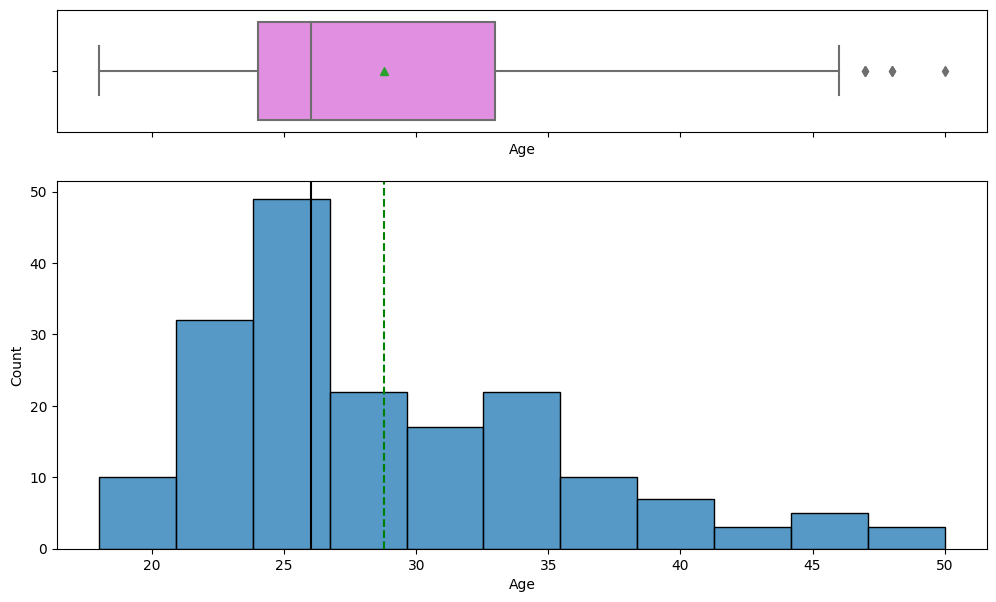

In [30]:
histogram_boxplot(cardio, "Age");

- We can see that the data is right skewed and there are few outliers after 46.

- From the histogram we can see that most customers of age 23 to 35 tend to buy treadmills.

**Let's check the Education of the customers**

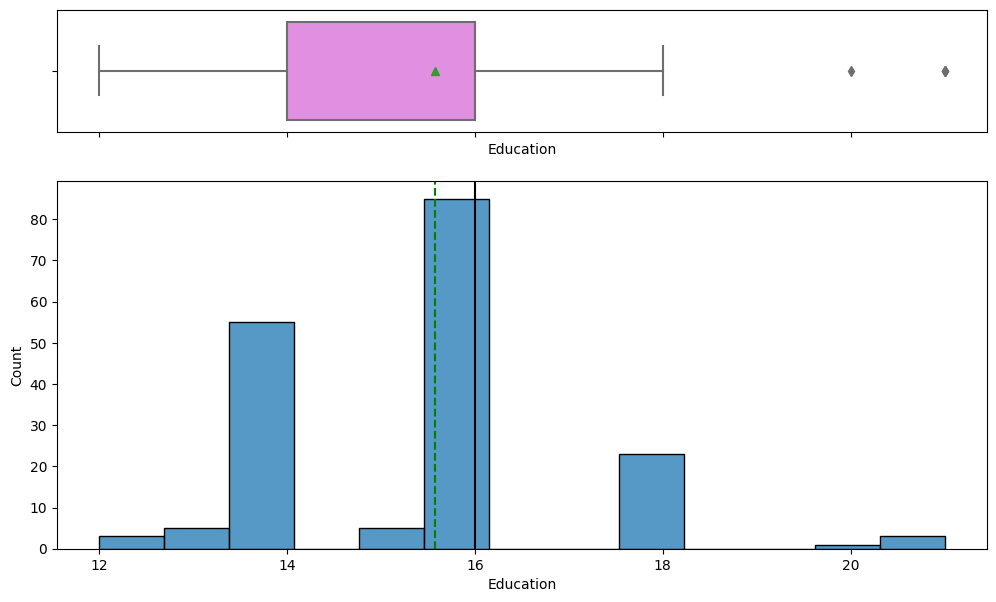

In [31]:
histogram_boxplot(cardio, "Education");

Finding the unique Education years of the customers.

In [32]:
#code to find the unique Education year values.
cardio['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

- The Education years are 12(High school), 13, 14, 15(Trade School/Diploma), 16(Bachelors), 18,(Masters) 20, 21(PhD).
- Most of the Customers have 14 to 16 years of education that means they have decent knowledge on health.
- And there are very few outliers, customers with 20/21 years of Education(PhD).

- The median and 75% percentile are same which is 16.

- The max is 21.


**Let's see the distribution of the Usage of the customers.**

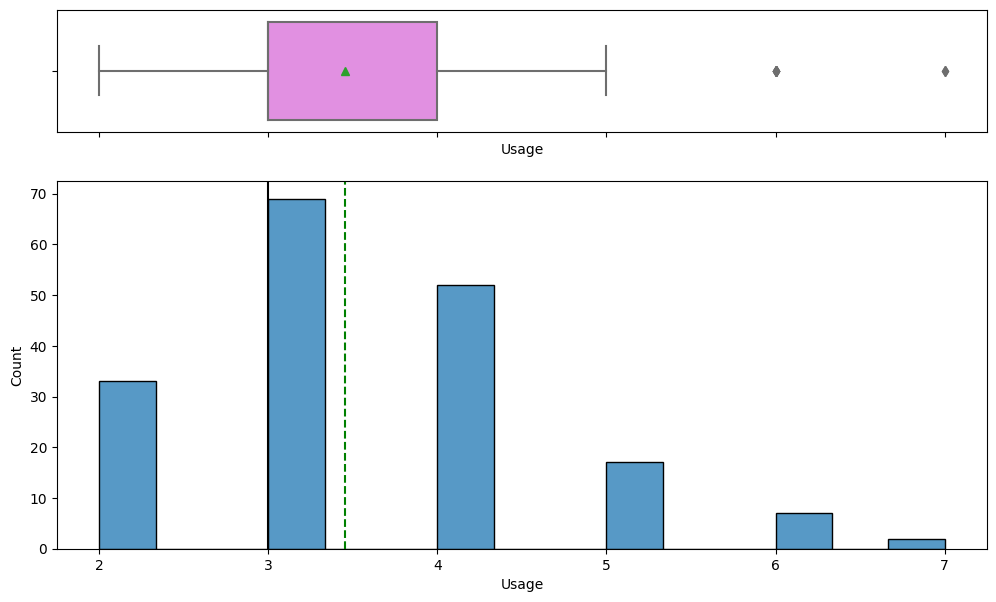

In [33]:
histogram_boxplot(cardio,"Usage");

- The 25% percentile and median are same which is 3. Hence we can observe both median and 25% overlap each other.

- Customers seem to use threadmill for 2 to 5 days of the week and most customers prefer for 3 or 4 days of the week(they might be excluding the weekends).  
- Fewer customers who use the threadmill for more than 5 days of the weeks are the outliers of in the box plot.

**Let's see the distribution for Income column**

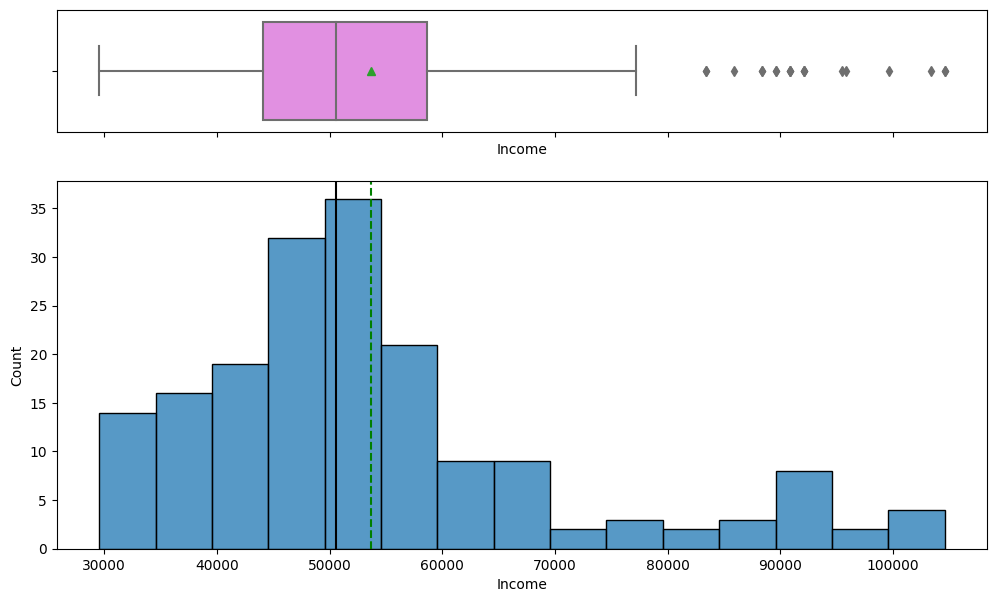

In [34]:
histogram_boxplot(cardio, "Income");

- Since Income can vary between individuals according to Education, Age and Experience, we can see the range from very low to high. And so, the presence of the outliers.
- The mean Income is 54000 and median is 49000.
- The distribution is right skewed and there are many outliers on the higher end.

**Let's see the distribution and statistical visualization for Miles column**

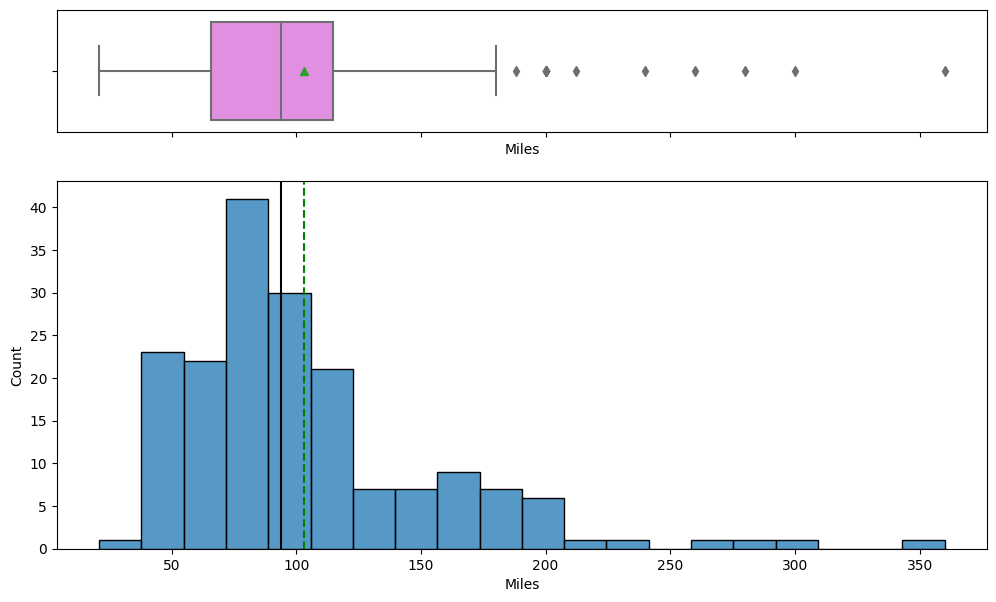

In [35]:
histogram_boxplot(cardio, "Miles");

- The distribution is right skewed and also has many outliers to the higher end.
- Most customers expect to run 100 miles in a week.
- Some runner expect to run more than 200 miles. And there are customers who expect more than 350, these might be some data collection error or some athelete or professional runner who bought the treadmill.

**NOW LET'S OBSERVE THE CATEGORICAL COLUMNS OF THE DATASET**

**Function to create labeled barplots  for the categorical  columns**

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Now let's see the Self-Rated Fitness score of the customers  using just the countplot**

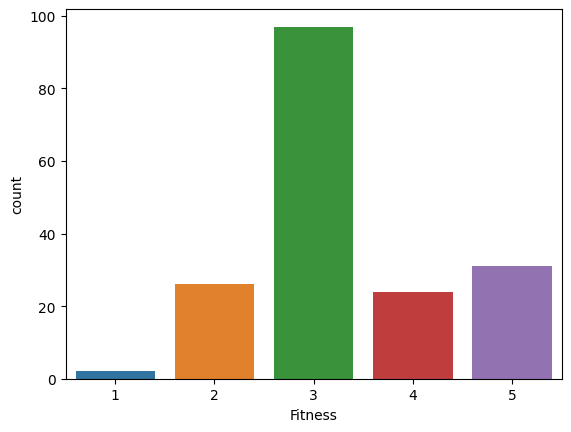

In [37]:
sns.countplot(data=cardio, x='Fitness');

**Let us see  the Fitness column using the labeled barplot function**

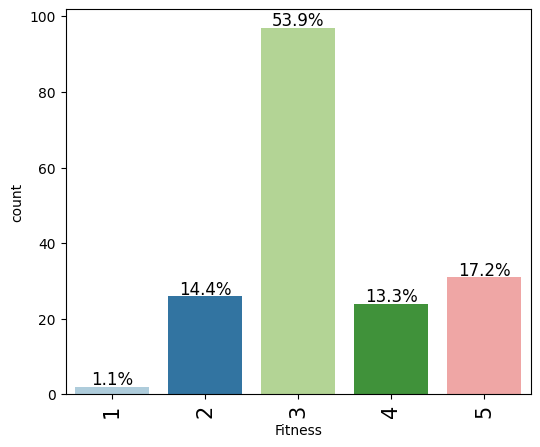

In [38]:
labeled_barplot(cardio,"Fitness", perc=True);

- As we can see the labeled barplot is showing the bars with the distribution in  percentages which makes us easy to read the plot.
- Most of the customers rated themselves a fitness level of 3(53.9%) on a scale of 5. Rating 1 being least fit and 5 being most fit.

**Observations on Product column**

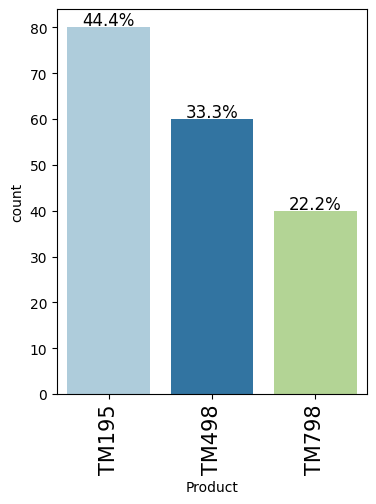

In [39]:
labeled_barplot(cardio, "Product", perc=True);

- The plot shows that most customers prefered to buy Product TM195(count is 80/44.4%), then TM498 (approximately 60/33.3%) and only 40 customers got TM798(22.2%).

**Observations on Gender column**

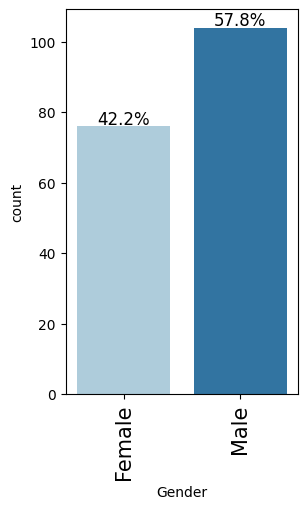

In [40]:
labeled_barplot(cardio, "Gender", perc=True);

- Most of the customers are Males(57.8%) compared to Females(42.2%).

**Observations on Marital Status**

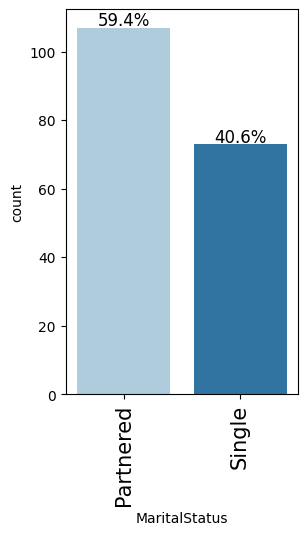

In [41]:
labeled_barplot(cardio, "MaritalStatus", perc=True);

- Most of the customers are Partnered(59.4%) compared to Singles(40.6%).

**Obervations on Education**

Earlier we have seen Education plot using histograms and barplots and it has shown mean of 15.5, so let us check the proportion of each level of Education among customers.

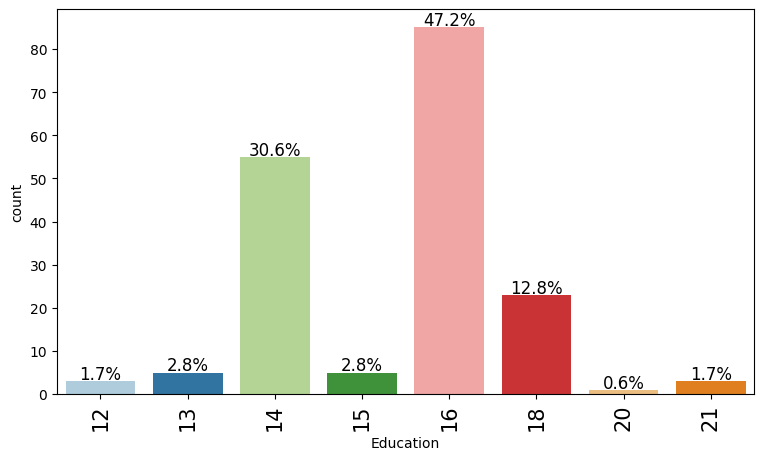

In [42]:
labeled_barplot(cardio, "Education", perc=True);

- Most of the customers have 16years(47.2%) of Education, which means most of them are graduates. Followed by 14 years(30.6%) of Education, high school diplomats.

**Observations on Usage ccolumn**

Let us check the Usage column using the labeled barplots to see the proportion on each level of usage among the customers.

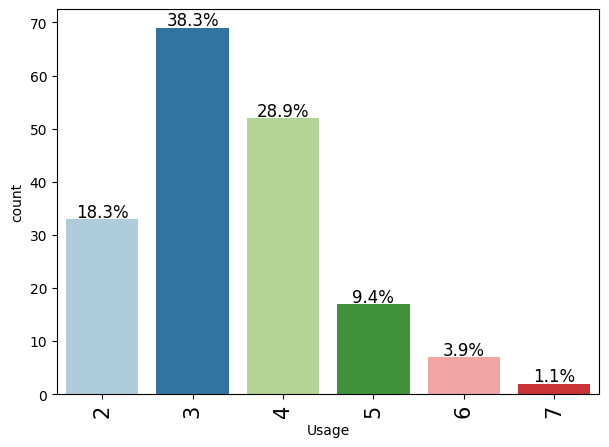

In [43]:
labeled_barplot(cardio, "Usage", perc=True);

- 38.3% of customers  expect to use the product for 3 days in a week, followed by 28.9% customers expecting to use 4 days in a week then 18.3% customers expecting to use 2 days in a week.

# Bivariate or Multivariate Analysis

**Let's now check the Heatmap for all the numerical variables.**


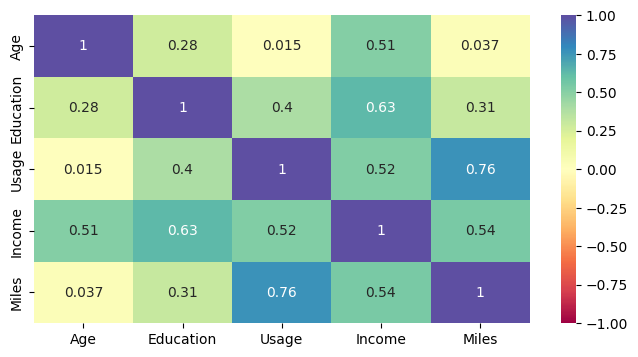

In [53]:
plt.figure(figsize=(8, 4));
sns.heatmap(cardio.corr(), annot=True, vmin=-1, vmax=1, cmap= 'Spectral');

**The observation from the above heatmap are:**

- Miles and Usage are positively correlated which is expected because customers who run for more miles will be able to use the product for more number of days in a week easily.
- Miles is positively correlated to Income and Education needs to be analyzed in deep.
- Miles and age does not show any correlation, as the range of age of the customers is between 18 to 50(not a wide range). And each of them had their own stamina and priorities/goals in using the treadmill regardless of age.
- Income and Usage are showing positive correlation which has to be analyzed more about the relationship.
- Income is positively correlated to Age and Education which is obvious. As the person is highly educated or ages(experience also increases), the income increases too.
- Usage and Education are positively correlated which can be infered that people with good Education are health conscious and knows the importance of keeping health in good condition and so they tend to use the treadmill more number of days in a week.

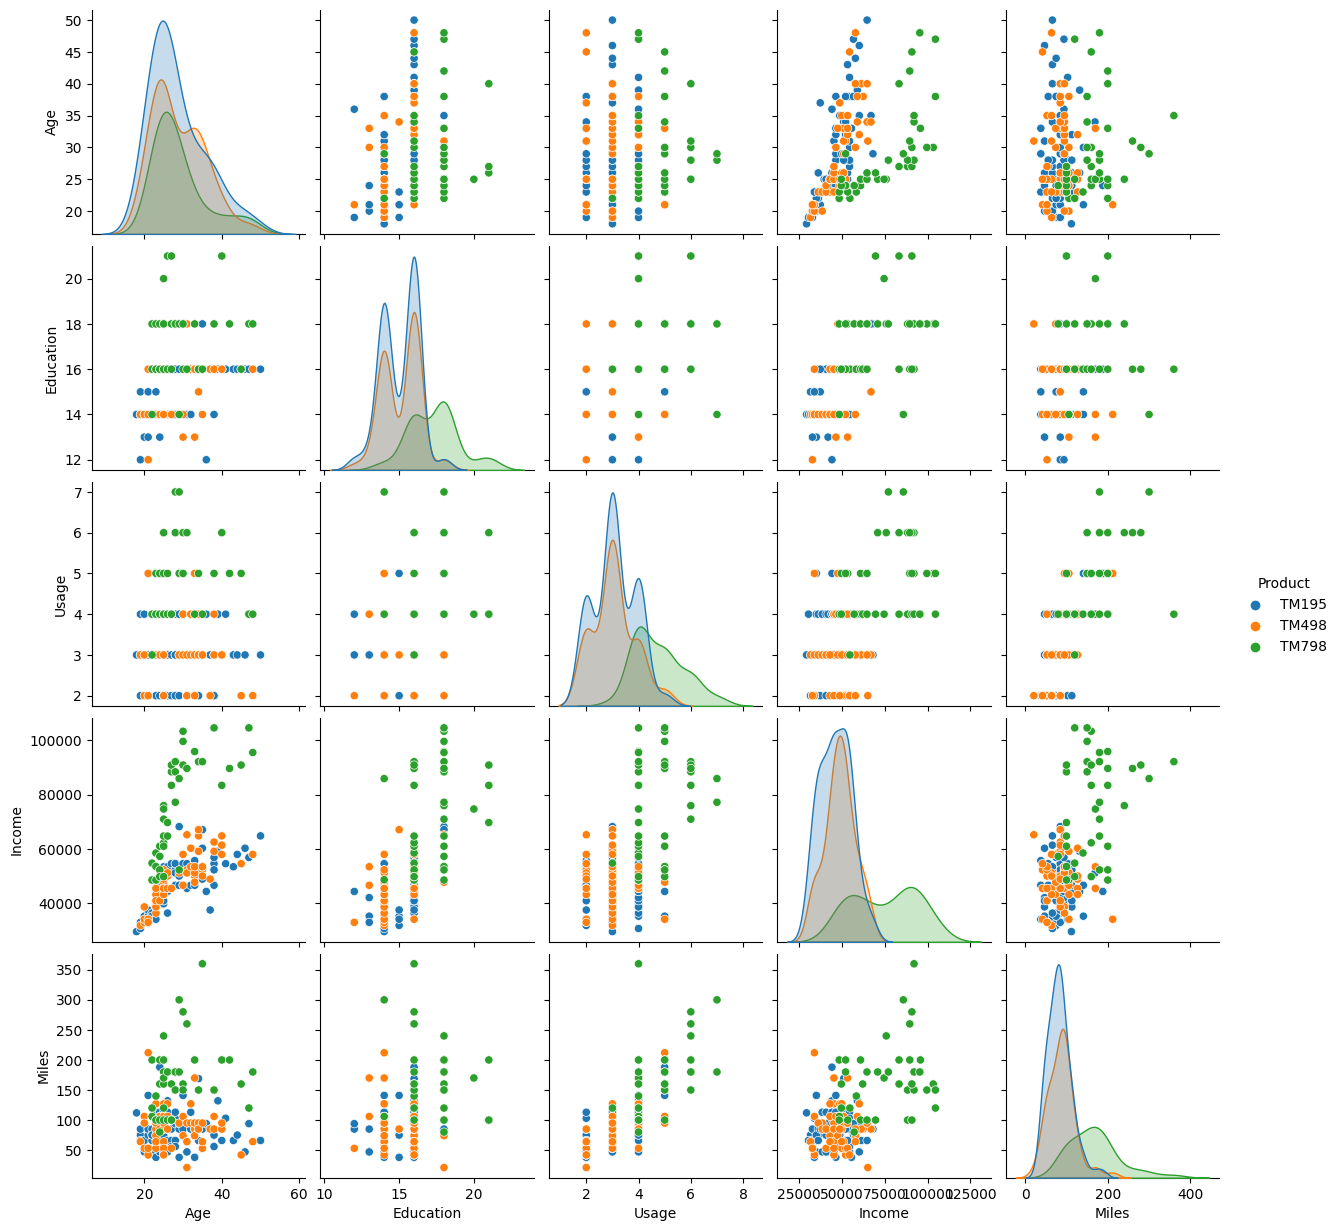

In [54]:
sns.pairplot(data=cardio.drop(["Fitness"],axis=1),hue="Product", diag_kind="kde")
plt.show()

- We can see from the pairplot above that customers with high income, more usage and high education bought TM798.
- Let us investigate more in detail and also regarding other two products in relation to other features.

####**Since the PRODUCT column is the dependent variable in the dataset let us check the observations with all other independent variables with PRODUCT column.**

**Observations on MaritalStatus vs Product**

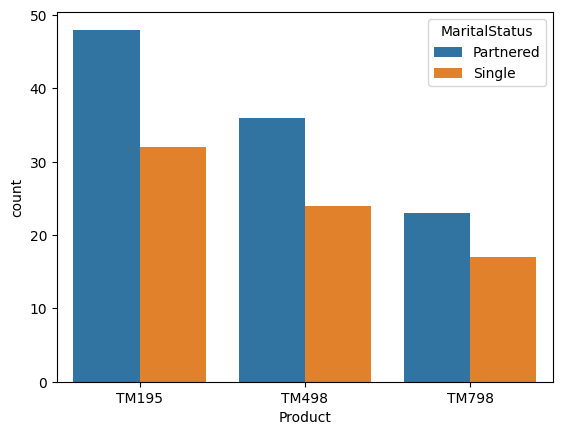

In [55]:
sns.countplot(data=cardio, x='Product', hue='MaritalStatus')
plt.show()

- The preference of the Product TM195 is more than the other products TM498, TM798.
- There are higher number of partnered customers buying these three products compared to Single customers.

**Observations on Age vs Products**

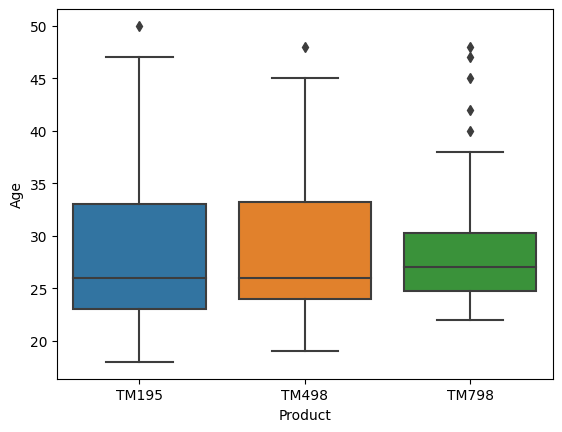

In [56]:
sns.boxplot(data= cardio, x='Product', y='Age');

From the above graph, we say the folowwing:
- The product TM195 was preferred by all th age groups. The group of age between 23 to 34 prefer this product a lot. There is an outlier near 50.
- The product TM498 was preferred by all the age groups like TM198 with very minute difference. This also has an outlier below 50.
- The product TM798 is preferreb by customers of age 25 and 30. And there are outliers after 40.


**Observation on Gender vs Product**


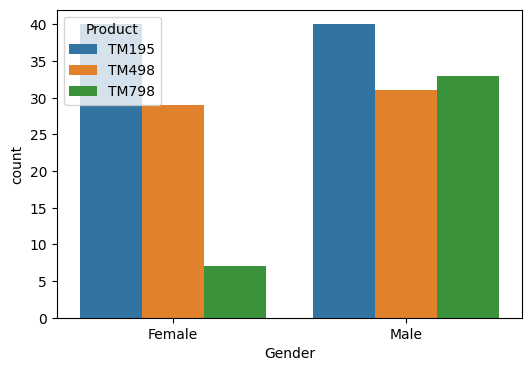

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(data=cardio, x='Gender', hue='Product')
plt.show()

- Product TM195 is equally preffered by both Males and Females.But the TM798 product is mostly prefered by Males than Females, so thus we can say that the product may be easily available and reasonably/less priced. Because mostly females get attracted to low price things.
- Product TM498 is prefered by equal number of males and females which says that this product may also an inexpensive one.
- Product TM798 is mostly prefered by Males than females which infers that this may be little expensive or was a sophisticated piece of eqipment.





**Observations on Education vs Products**

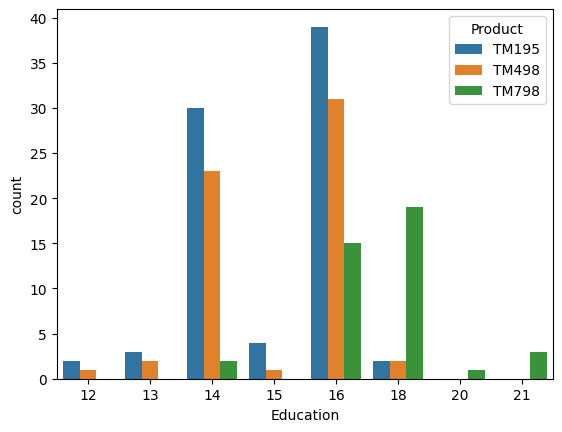

In [58]:
sns.countplot(data=cardio, x="Education", hue="Product");

- Product TM195 and Product TM498 seems like both are competing products where the later has same or less number of customers compared to TM195.
- Customers with Education 12 to 18 prefer either TM195 or TM498. And customers with 14 or 16 years of Education prefer buying the tredmill in that most of them prefer productTM195.
- We can see that TM798 is prefered by customers with 16/18 years of experience. And there are customers with 20/21 years of education who are mostly buying only TM798.
- From the above we can say that mayb TM195 and TM498 is little less price or easily available or easy to use soon after buying. And TM798 may be little expensive or has high tech features as only people with higher education are prefering it.

**Observations on Marital Status vs Products**

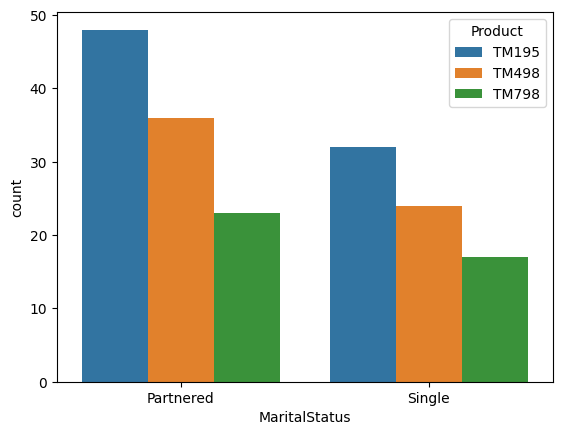

In [59]:
sns.countplot(data=cardio, x='MaritalStatus', hue='Product');

- The company has more number of partnered customers than Singles.
- Partnered customers tend to choose TM195 than other two products.
- Singles tend to choose TM195 than other two products.
- All these products are couple/Single friendly.

**Observations on Products vs Usage**

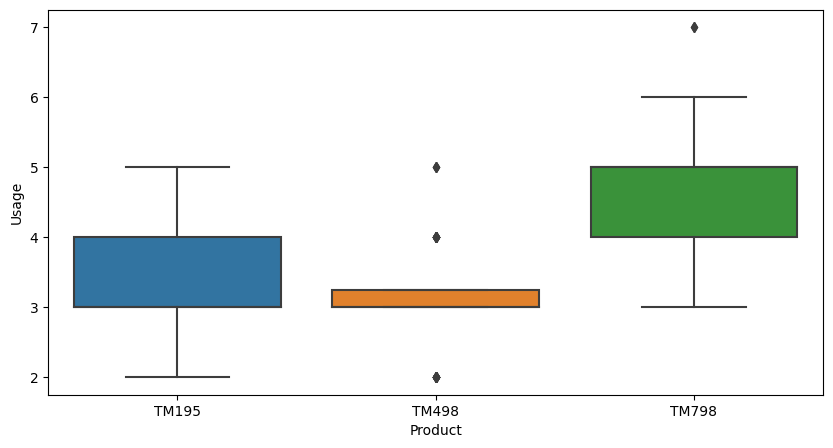

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cardio, y="Usage", x="Product");

- There are many customers who use the product TM195 for 2 to 5 days a week in which more than 50% of the customers use 3 to 4 days in a week.
- The customers who bought TM798 uses for 3 to 6 days in a week with more than 50% using 4 to 5 days. The outliers are the customers who use the 7 days in a week.
- Customers who use very less or who thinks they might use but not sure use product TM498.
**looks like customers who use the product more number of days in a week or someone who is ultra fitness freak tend to buy TM798.**

**Observations on Income and Products**

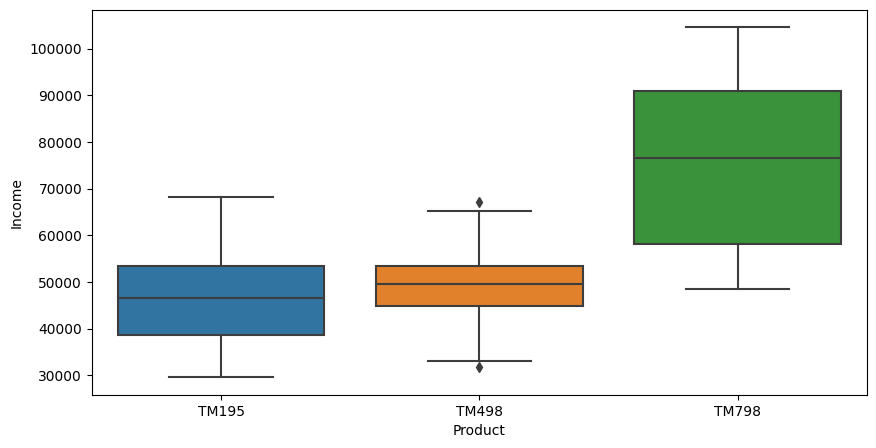

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cardio, y='Income', x='Product');

- Customers who bought TM195 have decent salary from 30k to 70k, most of them range between 39k and 52k.'
- Customers who bought TM498 product have salary range same as TM195.
- Customers who bought TM798 have higher income range.

**Swarm plot for the Income and Product attributes**

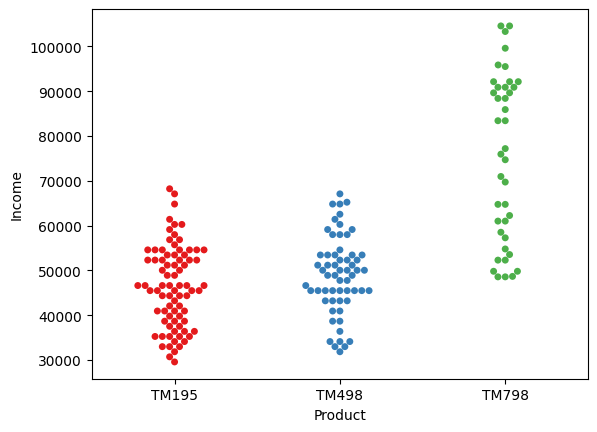

In [ ]:
sns.swarmplot(data=cardio, x='Product', y='Income', palette = 'Set1')
plt.show()

- As you may see the customes who bought product TM798 have high income so we can also say that this product maybe prefered by high income.



**Observation on Miles vs Products**

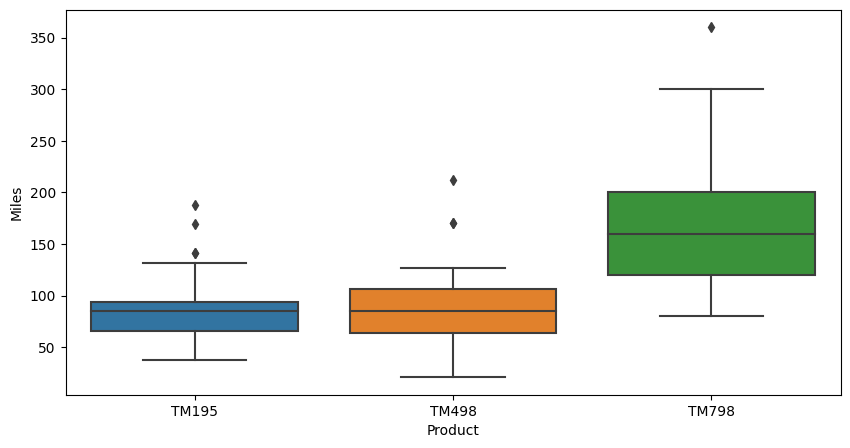

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cardio, x='Product', y="Miles");

- Customers who run more miles tend to buy TM798.
- Customers who run less tend to buy either TM498 or TM195.

**Observations on Fitness vs Products**

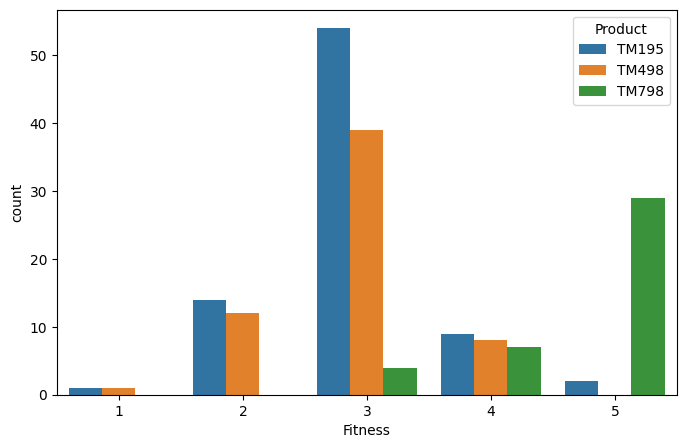

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(data=cardio, x='Fitness', hue="Product");

- Customers who rank themselves as 3 for fitness bought TM195. And next is the product TM498.
- Customers who rank themselves as 5 for fitness bought TM798.
- Customers who rank themselves as 2 have bought TM 195 or TM 498 and Customers who rank tneselves as 4 have bought TM195/TM498/TM798. The difference is very low.


###**Grouping data with repect to Products to build customer profiling:**

In [64]:
cardio[cardio['Product']=='TM195'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.0000,80,80.0000,80,80.0000,80.0000,80.0000,80.0000
unique,1,NaN,2,NaN,2,NaN,5.0000,NaN,NaN
top,TM195,NaN,Female,NaN,Partnered,NaN,3.0000,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,54.0000,NaN,NaN
mean,NaN,28.5500,NaN,15.0375,NaN,3.0875,NaN,46418.0250,82.7875
std,NaN,7.2215,NaN,1.2164,NaN,0.7826,NaN,9075.7832,28.8741
min,NaN,18.0000,NaN,12.0000,NaN,2.0000,NaN,29562.0000,38.0000
25%,NaN,23.0000,NaN,14.0000,NaN,3.0000,NaN,38658.0000,66.0000
50%,NaN,26.0000,NaN,16.0000,NaN,3.0000,NaN,46617.0000,85.0000
75%,NaN,33.0000,NaN,16.0000,NaN,4.0000,NaN,53439.0000,94.0000


**PRODUCT TM195**

This product has many customers compared to other two products.
- Most of the customers are females.
- The minimum age of the customers is 12 and years of Education ranges between 12 and 18.  
- Average income of the customers is 46k and ranges from 29k to 68k.
- Average usage of the product is 3 days a week so they use light to moderate.
- Most of them gave 3 as their fitness ranking.
- Average number of miles run is 83 and range between 38 and 188 so they are light runners.

In [65]:
cardio[cardio['Product']=='TM498'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.0000,60,60.0000,60,60.0000,60.0000,60.0000,60.0000
unique,1,NaN,2,NaN,2,NaN,4.0000,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,3.0000,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,39.0000,NaN,NaN
mean,NaN,28.9000,NaN,15.1167,NaN,3.0667,NaN,48973.6500,87.9333
std,NaN,6.6452,NaN,1.2226,NaN,0.7997,NaN,8653.9894,33.2631
min,NaN,19.0000,NaN,12.0000,NaN,2.0000,NaN,31836.0000,21.0000
25%,NaN,24.0000,NaN,14.0000,NaN,3.0000,NaN,44911.5000,64.0000
50%,NaN,26.0000,NaN,16.0000,NaN,3.0000,NaN,49459.5000,85.0000
75%,NaN,33.2500,NaN,16.0000,NaN,3.2500,NaN,53439.0000,106.0000


**PRODUCT TM498**

This product customers' behavior is similar to TM195 customers' in most of the aspects. The customers are just slight better in terms of average income, average miles. They might be busy with their daily schedule and so no time to focus on their fitness which is why they think the usage is bit less and so the broader range in number of miles.  
- Average income is approximatley 49k.
- Average number of miles is 88 and the range is between 21 and 212.
- Average usage is 3 days a week.
- 12 to 18 years of Education.
- Average age is approximately 29. Minimum age of a customer is 19.
- The number of males and females are almost same as it is 31 males out of 60 customers.


In [66]:
cardio[cardio['Product']=='TM798'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.0000,40,40.0000,40,40.0000,40.0000,40.0000,40.0000
unique,1,NaN,2,NaN,2,NaN,3.0000,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,5.0000,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,29.0000,NaN,NaN
mean,NaN,29.1000,NaN,17.3250,NaN,4.7750,NaN,75441.5750,166.9000
std,NaN,6.9717,NaN,1.6391,NaN,0.9470,NaN,18505.8367,60.0665
min,NaN,22.0000,NaN,14.0000,NaN,3.0000,NaN,48556.0000,80.0000
25%,NaN,24.7500,NaN,16.0000,NaN,4.0000,NaN,58204.7500,120.0000
50%,NaN,27.0000,NaN,18.0000,NaN,5.0000,NaN,76568.5000,160.0000
75%,NaN,30.2500,NaN,18.0000,NaN,5.0000,NaN,90886.0000,200.0000


**PRODUCT TM798**

The customers who use this product are highly educated and earn high income and are very fit compared to other two products.
- Average age is 29. No much difference compared to other products.
- Most of them are Males who use this product(33 out of 40 customers).
- Years of Education is 14 to 21 years.
- Consider them as very fit: Most of them rank themselves as 5 on a sclae of 1 to 5 for fitness ranking.
- Usage is 5 days in a week on an average.
- Have a higher income range and average being 75k.
- Miles range is 80 to 360 with average of 167.

####**Let us find some more observations/plots on the features**

**Since the features like Income, Education, Usage, Miles, Fitness mostly have larger impact on customer buying the Product or customer choosing the type of product, let us see some more graphs to infer more about this and we will also try to find for any strong correlation between other features like Age, Gender, Marital status as well.**

**Plotting to see the relation between INCOME, EDUCATION, PRODUCT**

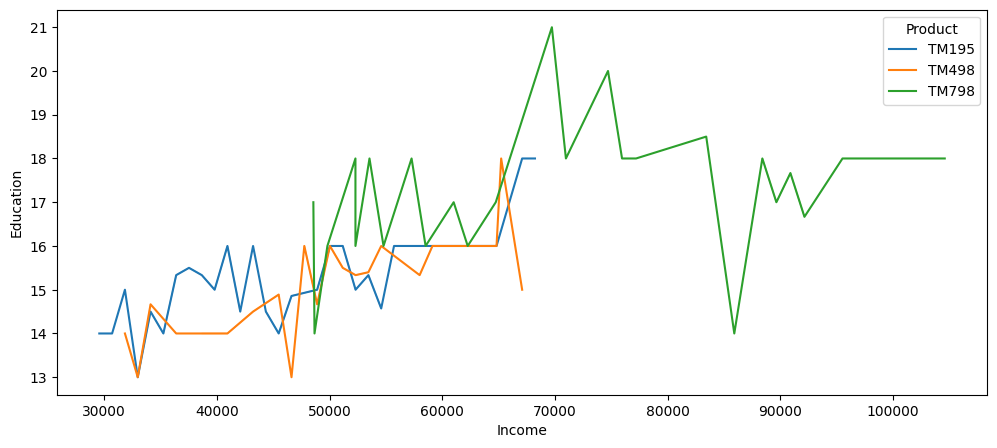

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=cardio, x='Income', y='Education', hue='Product', ci=0);

- The customers who bought TM195 or TM498 mostly have same range of income but a slight difference in Education.
- The customers who bought TM798(green line in the baove graph) have high income and higher Education than other products.
- From which we can make few assumptions on TM798 like:
  - This maybe a little expensive one as the customers with high income tend to prefer this product. It may also has sophisticated features/high tech features as the result people with higher education preferred this product. Since the price/product features are not mentioned in the data, we can not make some vague assumptions on this.

**INCOME vs MILES vs PRODUCT**

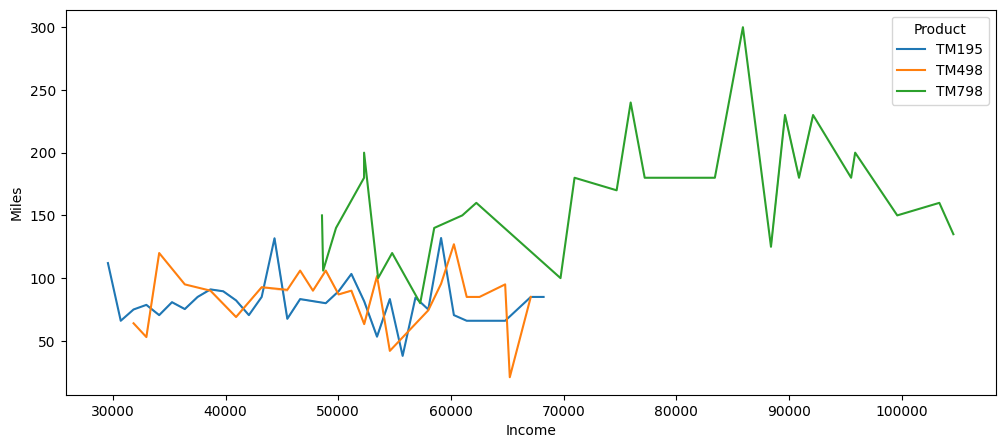

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=cardio, x='Income', y='Miles', hue='Product', ci=0);

- Customers who bought TM195 and TM498 have Income range between 28k to 68k with Miles from 20 to 120.
- Cutomers who bought TM798 have Income range between 48k to 120k with Miles from 100 to 300.

**AGE vs INCOME vs PRODUCT**

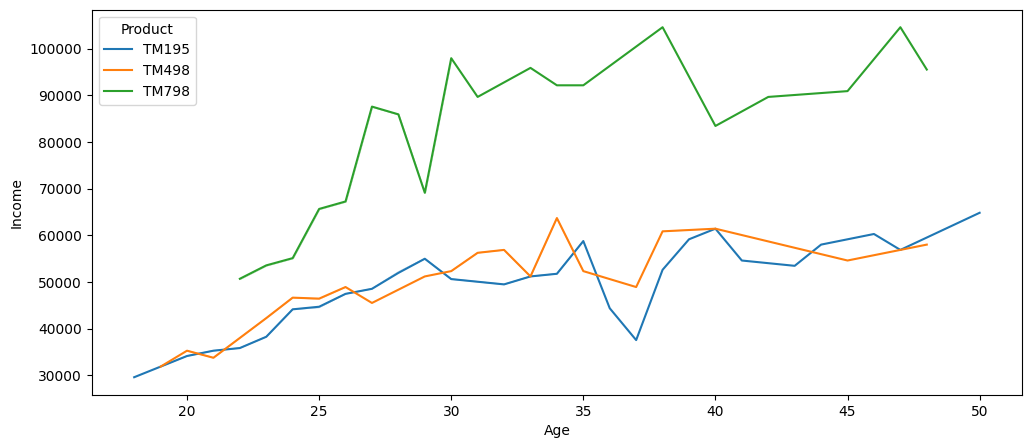

In [68]:
plt.figure(figsize=(12,5))
sns.lineplot(data=cardio,  x= 'Age', y='Income', hue='Product', ci=0);

- TM195 and TM498 products have customers with similar age group(18 - 49/50) and similar income - 30k to 65k.
- TM798 customers have high range of income and Age range is slightly less than the other products that means when the minimum age of TM195 customer is 16/17, the minimum age of TM798 customer is 22. Income range 50k to more than 100k.

**INCOME vs MILES vs EDUCATION**

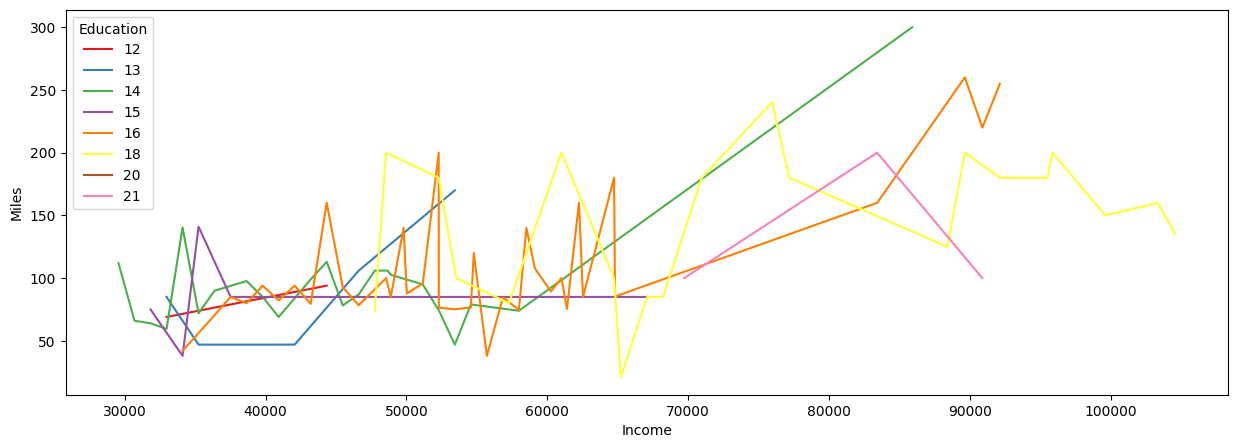

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=cardio, x='Income', y='Miles', hue='Education', ci=0, palette = 'Set1');

- Customers with Income more than 70k and expect to run Miles fromm 100 to 300 have Education 14, 16, 18, 21 years.

**AGE vs MILES vs MARITAL STATUS**

**USAGE vs FITNESS vs PRODUCT**

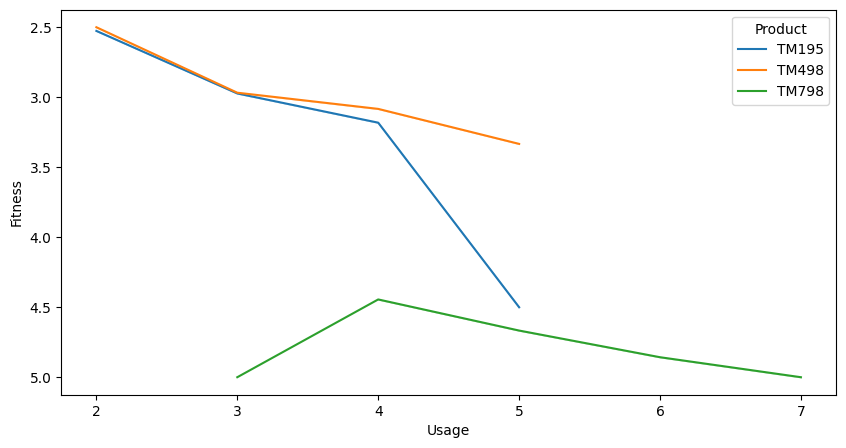

In [71]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cardio, x= 'Usage', y='Fitness', hue= 'Product', ci=False);

- We can see from the above graph that as the Usage increases the Expected fitness rantings increase or customers who think they are fit use the product more in a week.
- TM798 product has highest fitness rantings(4.5 to 5) than the other two products. And TM498 product fitness ratings are high as the usage increases. The TM195 customers are very light users and consider themselves as moderate fit.

**USAGE vs EDUCATION vs PRODUCT**

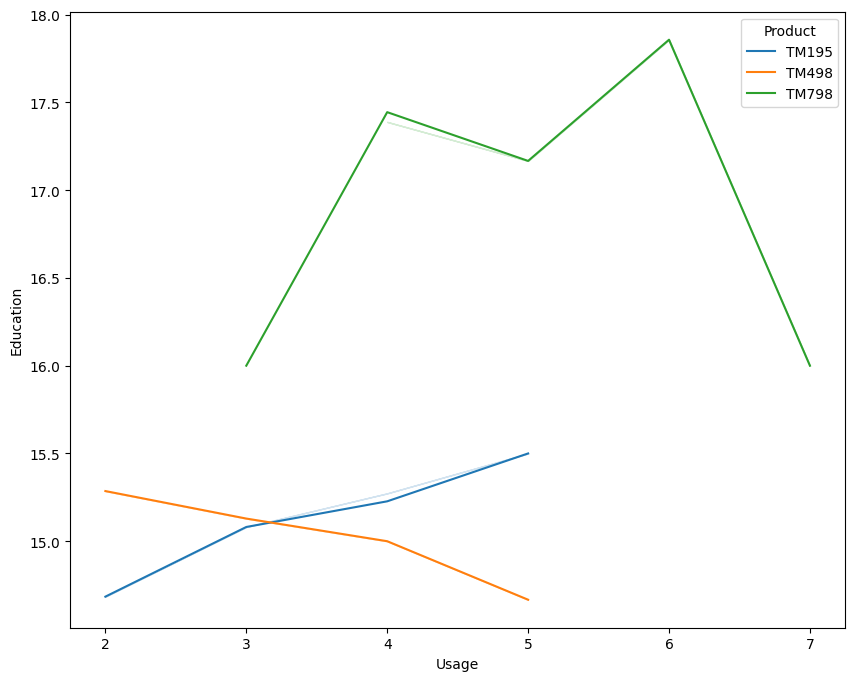

In [73]:
#plot to observe the trends in Usage, Education, Product
plt.figure(figsize=(10,8))
sns.lineplot(data=cardio, x='Usage', y='Education', hue='Product' , ci=False);

- We can analyse that the higher education customers are preferring the Product TM798 and as education and income are highly (positive) correlated and from the previous Income analysis we can say that the higher education, higher income and so they prefer TM798.
  - But there is slight decrease in the line(Education) as it drops as the usage increases from 6 to 7. Customers who use 6 days a week has the highest education than other customers who expects to use 7 days a week so in this case these customers may be atheletes with bachelor degree(can not conclude due to no data).

- And the higher educated customers' usage is more compared to the other 2 products.
- TM498 shows negative relation to Usage and Education. The Education level decreases as the Usage increases.
- TM195 shows positive relation to Usage and Education. Education and Usage increases gradually. But the both the product customers have less years of Education compared to TM798.

**FITNESS vs EDUCATION vs PRODUCT**

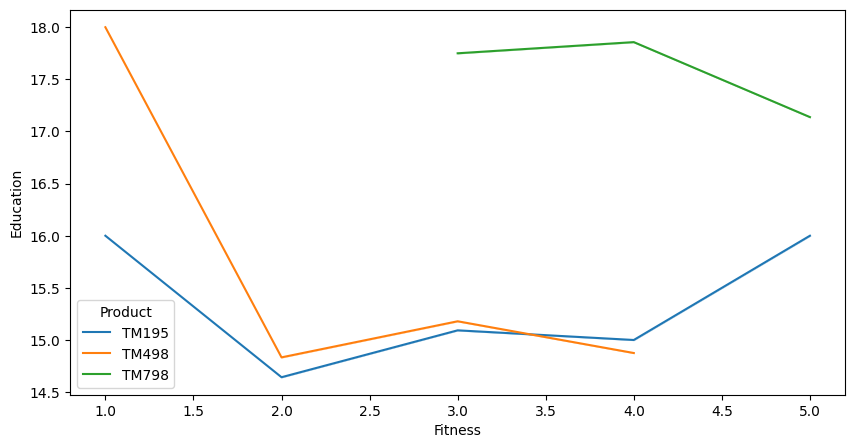

In [75]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cardio, x='Fitness', y='Education', hue='Product', ci=False)
plt.show()

- Customers who consider themselves as very fit and who has high Education, preferred to buy TM798. This is because high Education leads to high Income and so we may say that TM798 is bit expensive as most of the TM798 customers are Males, high Education, high Income, consider themselves fit and expects to use a lot. Usually customers with these features do not shy away from spending more on fitness product.
- There are also few TM195 customers who consider themselves as very fit(5) and also with low fitness score as 1 but with 16 years of Education.
- There are also few TM498 customers who has high level of Education(18 or more) with self fitness scoring as 1. And few customers with high fitness rating as 4 with low Education as 15.


**USAGE vs INCOME vs PRODUCTS**

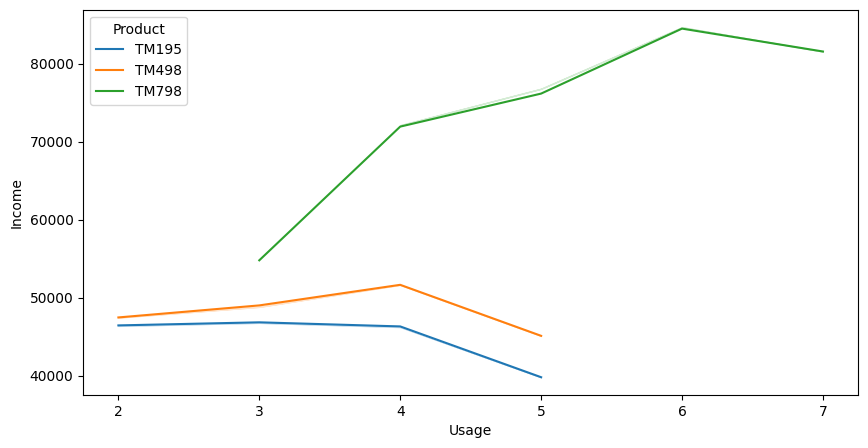

In [76]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cardio, x='Usage', y='Income', hue='Product', ci=False)
plt.show()

- Customers whose Income increases also has increase in the Usage(positve correlation-green line in the graph) and bought TM798.
- Customers who bought TM195 or TM498 has low Income and even though the Usage is increasing(2 to 5), they preferred TM195/TM498.

**FITNESS vs INCOME vs PRODUCT**

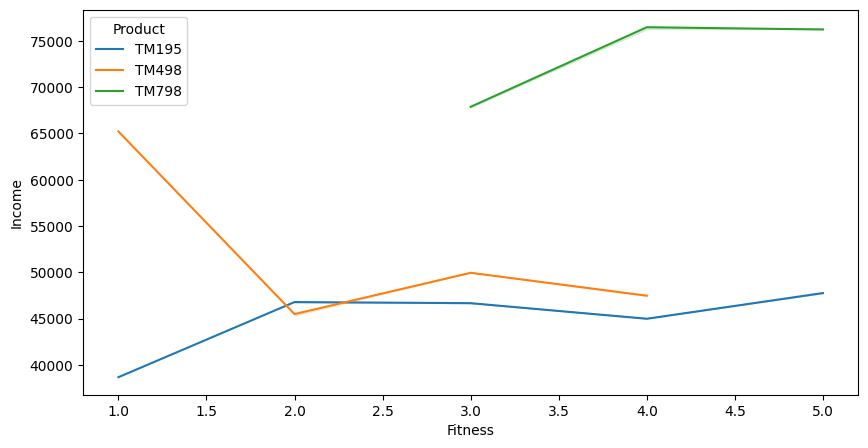

In [77]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cardio, x='Fitness', y='Income', hue='Product', ci=False);

- TM798 customers have high Income and high Fitness scores.
- TM498 customers have low Income who considered themselves as fit and high Income who considered themselves as not so fit. So Income is negative correlated to fitness.
- TM195 customers have no relation between Income and fitness levelsas the blue line in the graph is almost parallel to fitness(x-axis).

**INCOME vs GENDER vs PRODUCT TM798**

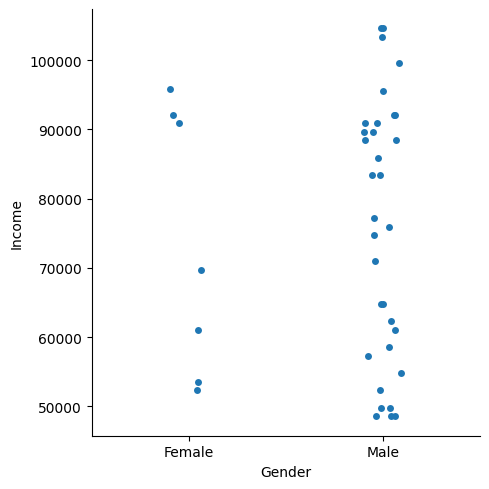

In [69]:
sns.catplot(data=cardio[cardio['Product']=='TM798'], x='Gender', y='Income')
plt.show()

- This shows that the women are least prefering the TM798 product though the Income range of these women is between 51k and 98k.

**AGE vs MILES vs MARITAL STATUS**

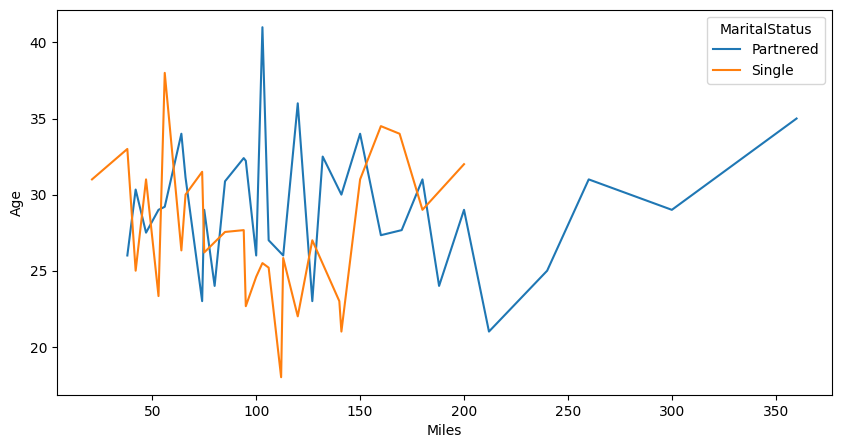

In [84]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cardio, x='Miles', y='Age', ci=None, hue = 'MaritalStatus');

- The graph shows that there is no much relation between Age and Number of Miles for Singles and Partnered customers upto the customers with less than 200 Miles run.
- Partnered customers with more than 200 Miles also show gradual increase in Age.
- **We can use some more tables and graph to show this clearly.**

In [82]:
cardio[(cardio['MaritalStatus'] == 'Single') & (cardio['Age'] > 35)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
66,TM195,36,Male,12,Single,4,3,44343,94
70,TM195,38,Male,14,Single,2,3,52302,56
76,TM195,44,Female,16,Single,3,4,57987,75
136,TM498,40,Female,16,Single,3,3,57987,85
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160


- From the graph and the from the above table we can say that Singles' Age and number of Miles run does not show any correlation. As there are customers with with less Miles who are younger and older and there are more Miles who are younger and older too.

In [86]:
cardio[(cardio['MaritalStatus']=='Partnered') & (cardio['Miles']>200)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
84,TM498,21,Female,14,Partnered,5,4,34110,212
155,TM798,25,Male,18,Partnered,6,5,75946,240
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
170,TM798,31,Male,16,Partnered,6,5,89641,260
173,TM798,35,Male,16,Partnered,4,5,92131,360


- Partnered customers with Miles more than 200 seems like they run more as their Age increases. 21 year old run for 212miles and 35 years old run for more than 350miles.
- We can show this in the graph below.

**Graph to just show the relation of Partnered customers with more than run more than 200 Miles and Age of them**

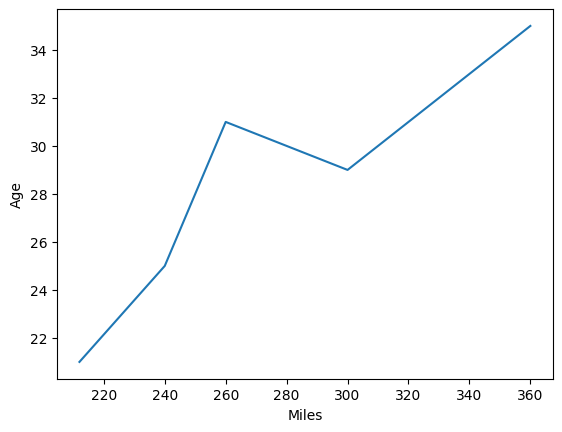

In [88]:
subdf1 = cardio[(cardio['MaritalStatus']=='Partnered') & (cardio['Miles']>200)] #copying the above dataframe into another variable as 'subdf1'
sns.lineplot(data=subdf1 , x=subdf1['Miles'], y= subdf1['Age'], ci=0); #using the new dataframe 'subdf1' to show the graph

**USAGE vs FITNESS vs GENDER**

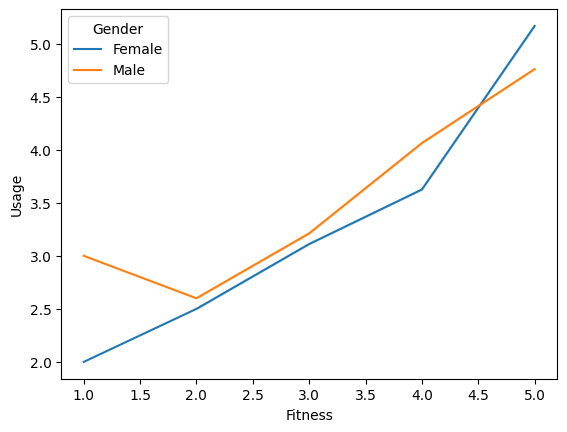

In [89]:
#Plotting to see the relation of the Fitnesss and Usage between Genders
sns.lineplot(data=cardio, x='Fitness', y='Usage', hue='Gender', ci=False)
plt.show()

- There is no much difference between Males and Females for their Usage and Fitness ratings.
- The Fitness and Usage are positively correlated for both Men and Women.

**USAGE vs FITNESS vs MARITALSTATUS**

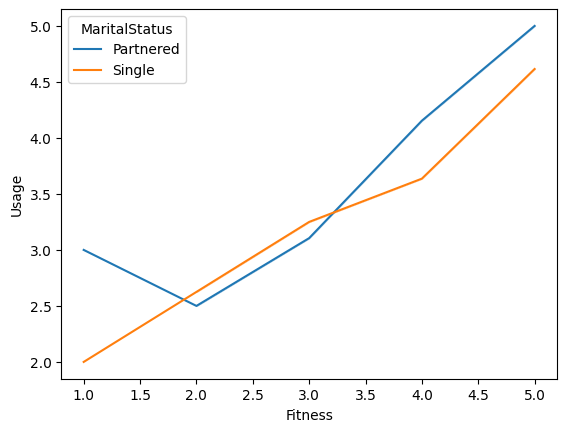

In [91]:
#plot to see the Usage and Fitness of the Single and Partnered customers
sns.lineplot(data=cardio, x='Fitness', y='Usage', hue='MaritalStatus', ci=False);

- There is no much difference between Single and Partnered customers of their Fitness and Usage of the product.
- The Fitness and Usage are positive correlated for both Singles and Partnered customers.


**GENDER vs MARITAL STATUS vs USAGE**

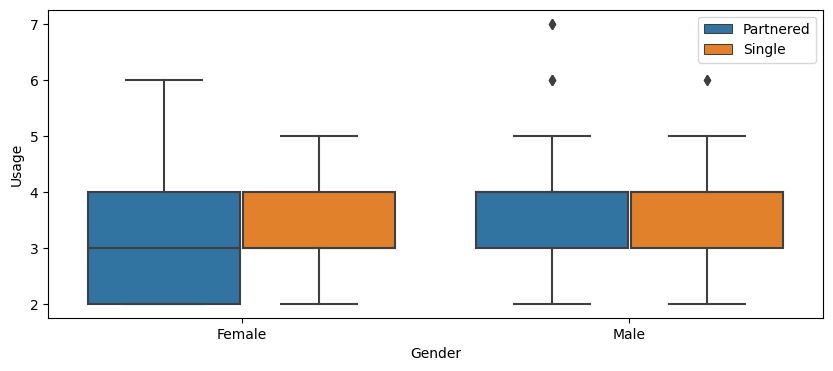

In [100]:
plt.figure(figsize=(10,4))
sns.boxplot(data = cardio, x = cardio["Gender"], y = cardio["Usage"],hue=cardio["MaritalStatus"]);
plt.legend(bbox_to_anchor=(1.00, 1));

- Usage for Singles Males or Females and Partnered Males is same but it slightly varies for Female Partnered customers.

**GENDER vs INCOME**

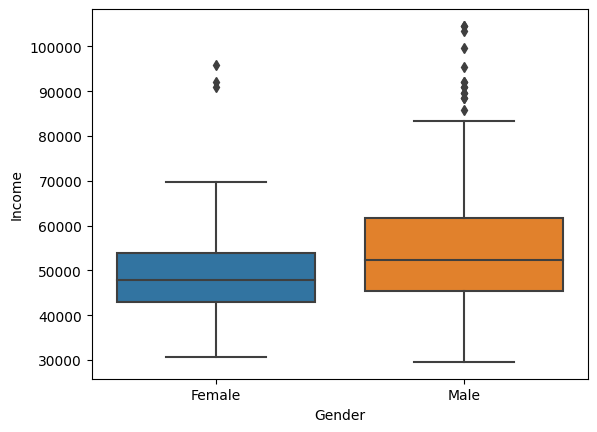

In [99]:
sns.boxplot(data = cardio, x = 'Gender', y = 'Income');

- There are more Males who have higher Income than Females with higher Income. And Males have the highest Income value (more than 100k).

**GENDER vs INCOME vs MARITAL STATUS**

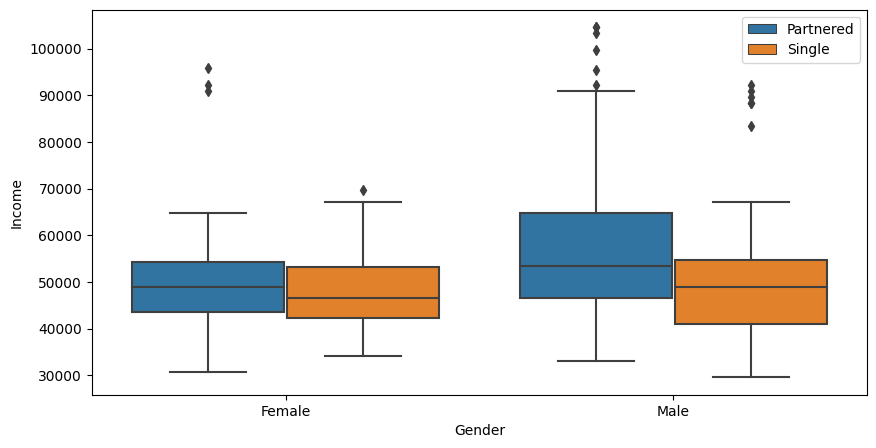

In [102]:
plt.figure(figsize=(10,5))
sns.boxplot(data = cardio, x = 'Gender', hue = 'MaritalStatus', y = 'Income');
plt.legend(bbox_to_anchor=(1.00, 1));

- Partnered males have high Income than the Partnered Females. There are more Partnered Males than Partnered Females.
- Similarly, Single Males have higher Income than Single Females and there are more Single Males than Single Females.
- There is no much difference between the Partnered or Single Females in terms of Income.

**GENDER vs MILES**

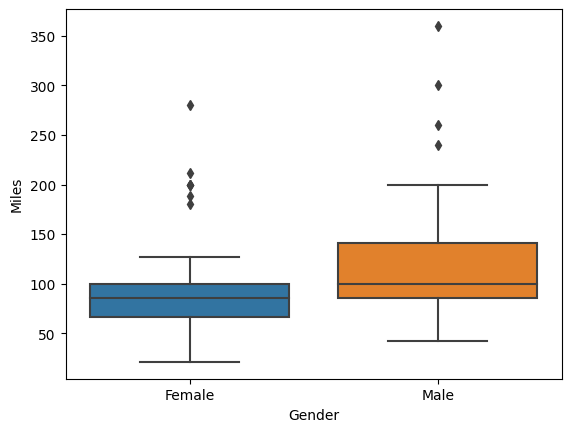

In [109]:
sns.boxplot(data = cardio, x = 'Gender', y = 'Miles');

- Males run more number of Miles than Females. There are more number of Males than the Females.

 **GENDER vs MILES vs MARITAL STATUS**

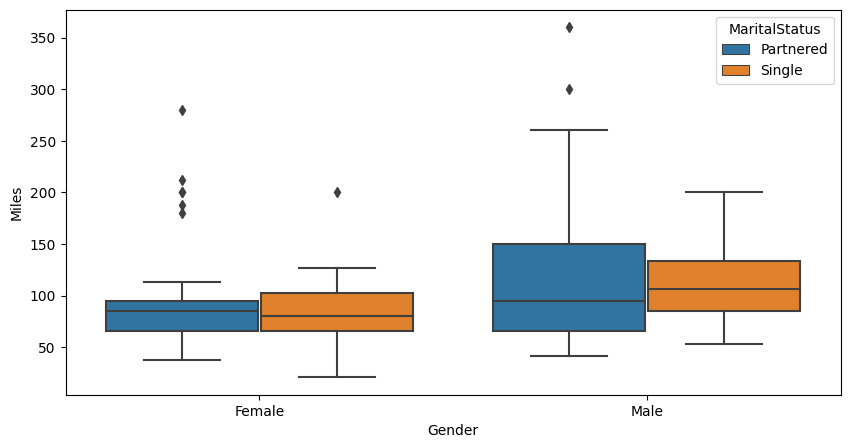

In [112]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = cardio, x='Gender', hue='MaritalStatus', y='Miles');

- There are more number of Partnered Men than any other group like the Single or Partnered Women, Single Men. And they run more than these groups.
- Single Men run more than the Partnered or Single Women.
- Single and partnered women has very slight difference.

**GENDER vs MILES vs EDUCATION**

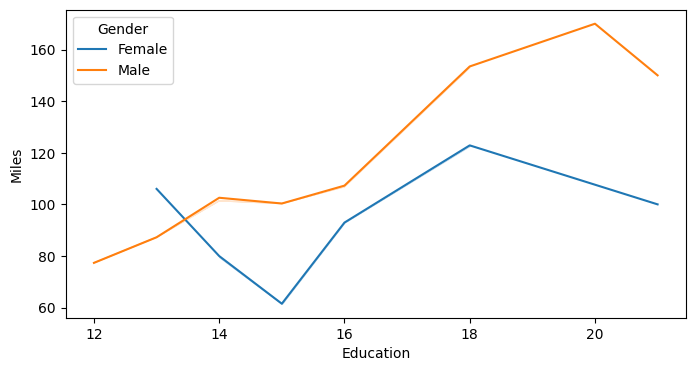

In [115]:
plt.figure(figsize=(8,4))
sns.lineplot(data = cardio, x = 'Education', hue = 'Gender', y = 'Miles', ci=False);

- Males with higher Education run more than the Males with lower Education and so Education and  Miles in case of Males is positively correlated.
- Females have high miles initially, in the above graph, when the Education is low, then the Miles decreased at 15 years of Education, then increased to 120 at 18 years followed by a bit decrease. From this graph we can say that Miles and Education doesn't show any correlation in case of Females. **Let us see a different graph if it shows any difference**

**Boxplot for GENDER vs MILES vs EDUCATION**

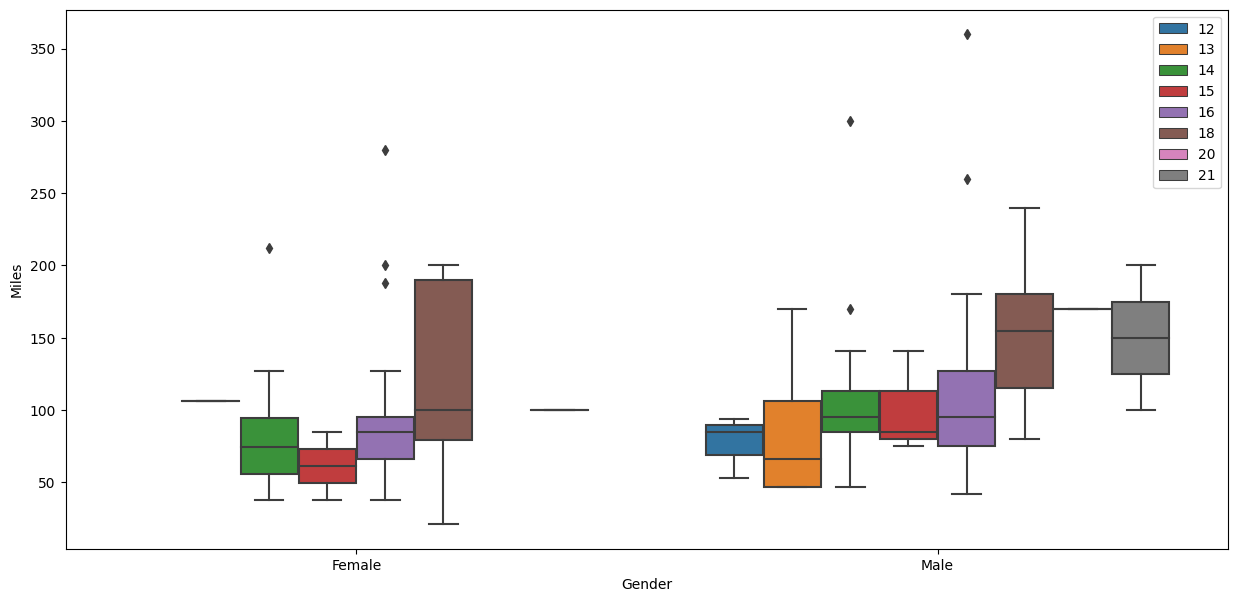

In [128]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio, x = "Gender",y = "Miles",hue = "Education");
plt.legend(bbox_to_anchor=(1.00, 1));

- From the above boxplot we see that Females with higher Education(18) run more compared to other levels of Education. So we can conclude that Miles and Education are slightly positively correlated incase of Females.

**AGE vs MILES vs GENDER**

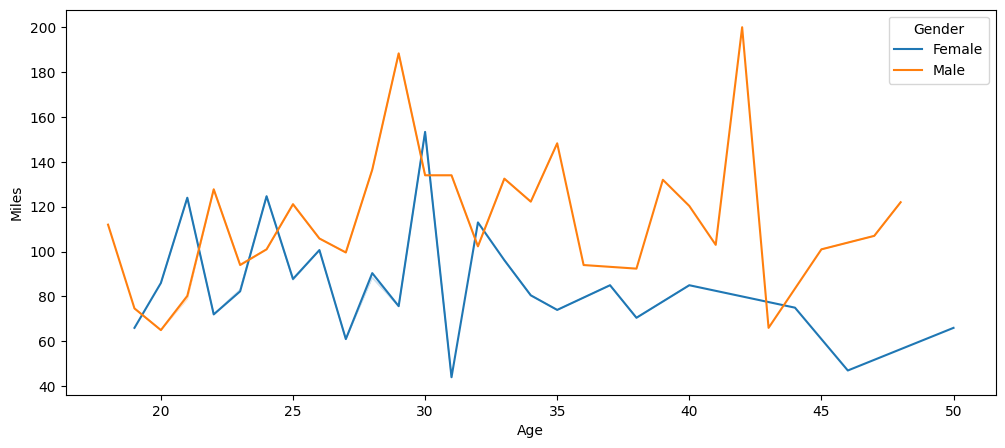

In [119]:
plt.figure(figsize=(12,5))
sns.lineplot(data = cardio, x='Age', y='Miles', hue='Gender', ci=False);

- We can see in case of Females that they run less as the Age increases.
- In case of Males, we see that they tend to run more as Age increases but we can not say it is positively correlated as there is not clear straight line in the abov graph.

# Treating the outliers

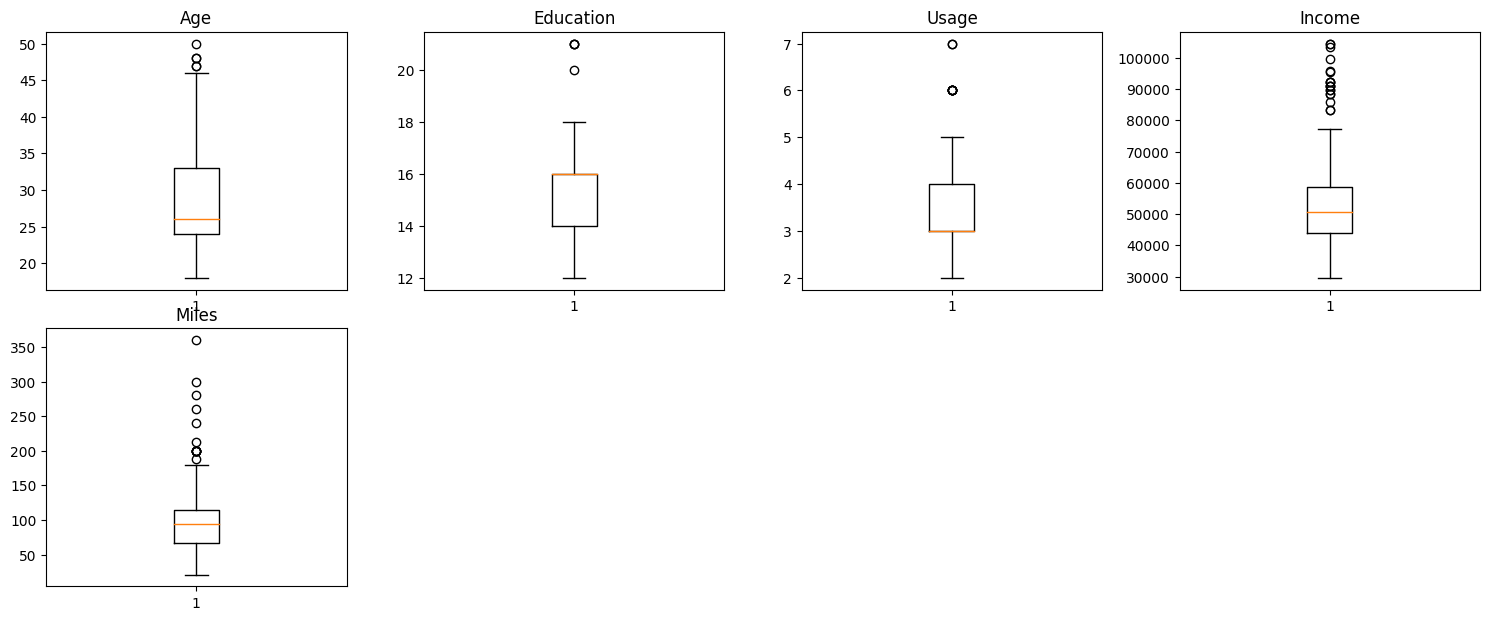

In [103]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_cols = ['Age', 'Education', 'Usage', 'Income', 'Miles']

plt.figure(figsize=(15,12))

for i, variable in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(cardio[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- **Age** of the customers in this dataset(18 to 50) is genuine as customers of these age group do buy threadmill as they are health conscious and would want to stay fit in all the seasons of the year. So these are not considered as outliers and we do not have to treat them. And there are no values that look odd or unethical.
- **Education** years also is genuine and some customers do have odd number of education years and this is when they are unable to finish the course or do not graduate due to several other reasons.
- **Income** of a person in Real World also differs according to Education, Experience, Age, Gender etc, so the oultiers in this column are genuine.
- Since the Usage values are between 1 to 7, the number of days in the week, we can consider them as genuine and we can have usage as 7 as there are people who are really serious about fitness and can do all the days in a week. **we will see this column below**

In [104]:
#code to observe the rows with Usage 7 days as they are shwon as outliers
cardio[cardio['Usage']>6]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
163,TM798,28,Male,18,Partnered,7,5,77191,180
166,TM798,29,Male,14,Partnered,7,5,85906,300



**As we can see above that there are just 2 rows with 7 days as Usage and the Miles of one customer is 300(athlete or a fitness freak). The other customer expect to do 180 Miles, all the 7 days in a week as he might be not the intense person as the other.**

In [105]:
#code to find the rows with Miles more than 150 as they are shown as outliers.
cardio[cardio['Miles']>150]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,TM195,24,Female,16,Partnered,5,5,44343,188
61,TM195,34,Male,16,Single,4,5,51165,169
84,TM498,21,Female,14,Partnered,5,4,34110,212
103,TM498,25,Male,14,Partnered,4,3,45480,170
120,TM498,33,Male,13,Partnered,4,4,53439,170
142,TM798,22,Male,18,Single,4,5,48556,200
148,TM798,24,Female,16,Single,5,5,52291,200
149,TM798,24,Male,16,Single,5,5,49801,160
151,TM798,25,Male,16,Partnered,4,4,62251,160
152,TM798,25,Female,18,Partnered,5,5,61006,200


- The Miles also depend on the person's time, stamina, mood and determination towards their goals, fitness and health.
We can not think the one with more Miles as not genuine as they might be atheletes and we do not have enough data to say they are not genuine without much information regarding the customers. Moreover, the Usage and Fitness of these customers are high too. So let us consider these as genuine and not treat them.
- **Miles are also genuine and  considering them as outliers and replacing or removing them would cause data loss.**

###**CONCLUSION:**

#####**KEY INSIGHTS:**

**TM195:**

- Mostly affordable(not expensive) with basic features so most of the customers are Females.
- Customers with basic income/basic Education/college going students who are an entry level fitness personal tend to buy this product.
- Customers who expect to use this for 3 to 4 days a week and give themselves a fitness score of 3 tend to buy this product.
- Customerss who run light to moderate tend to buy this product.

**TM498:**

- This is also an affordable product similar to TM195, but may be a bit more expensive in price as avearge income of the customers is little high.
- May have little advanced features as we can see that the ratio of Men to Women customers has decreased when compared  to TM195 product. Women usually prefers easy to use, basic features in less price.
- This has the same age group customers as TM195. But the customers run a little more than TM195.
- Customers usually use 3 days a week.

**TM798:**

- This product is expensive and may have highly advanced features as the customers are from high income group with higher Education.
- This product is for atheletes or for fitness enthusiasts and can be used intensively as this is the used by customers who run more miles and use it for all 7 days of the week.
- Customers are mostly Men and they are little elder in age.
- The customers who think they are very fit and give themselves high scores in fitness prefer this product.


###**BUSINESS RECOMMENDATIONS**

- The TM195 product is more affordable and so this product lures most of the customers due to its price range. TM798 product is expensive so this product brings profits to the company.
- The customers who bought TM798 are from high income, high education and they run more so the company should target highly educated/high income/more fitness enthusiasts and recommend them to buy high end product TM798.
- The company should try to convey that the product is for both genders as there are less Female customers to buy TM798 product and the company should also target younger group of people to buy TM798.
- Women above 30s tend to run less and use less so they can be recommended to use the less expensive one, TM195/TM498 as they are less expensive.
-  Partnered women should be recommended with all the three products according to their Income/Education/Usage. And the ones with high values should be recommended with higher end product, TM798.
- Single Men above 40 years run for more miles and so their usage is more so they should be recommended with TM798.
- Partnered Men usually have higher income so high end product TM798 should be recommended for them.
